In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../Data/spam.csv", encoding="cp1252")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2372,ham,Watching tv lor... Y she so funny we bluff her...,NaN,NaN,NaN
910,ham,My love ! How come it took you so long to leav...,NaN,NaN,NaN
3050,ham,Awesome question with a cute answer: Someone a...,NaN,NaN,NaN
1949,ham,Wait 2 min..stand at bus stop,NaN,NaN,NaN
5255,ham,Ok... Sweet dreams...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

#### Tasks:
1. Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Convert into webiste
8. Deployment on Heroku

#### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Drop last 3 columns as they have mostly null values

In [5]:
df = df.drop(columns=df.columns[2:])

Renaming columns headers for better description

In [6]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Encoding the Label column from text to numerical categorical column

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit_transform(df["target"])

array([0, 0, 1, ..., 0, 0, 0])

The encoder has encoded Label columns as:<br>
`ham` - 0<br>
`spam` - 1

In [8]:
df["target"] = encoder.fit_transform(df["target"])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Handling missing values

In [9]:
df.isnull().sum()

target    0
text      0
dtype: int64

Handling duplication values

In [10]:
df.duplicated().sum()

403

In [11]:
#removing duplicates
df = df.drop_duplicates(keep="first")
df.shape

(5169, 2)

#### EDA

Checking imbalance data

In [12]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

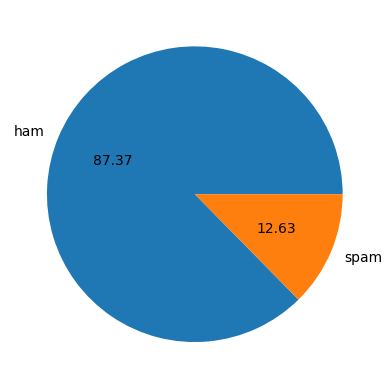

In [13]:
import matplotlib.pyplot as plt

plt.pie(df["target"].value_counts(), labels=["ham","spam"], autopct="%0.2f")
plt.show()

Exploring Characters in `text` feature

In [14]:
df["num_characters"] = df["text"].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import nltk

In [16]:
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [17]:
df["num_sents"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
df.head()

,target,text,num_characters,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
df.describe()

,target,num_characters,num_words,num_sents
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


Univearte analysis

In [20]:
#ham messages
df[df["target"]==0][df.columns[2:]].describe()

,num_characters,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
#spam messages
df[df["target"]==1][df.columns[2:]].describe()

,num_characters,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [22]:
import seaborn as sns

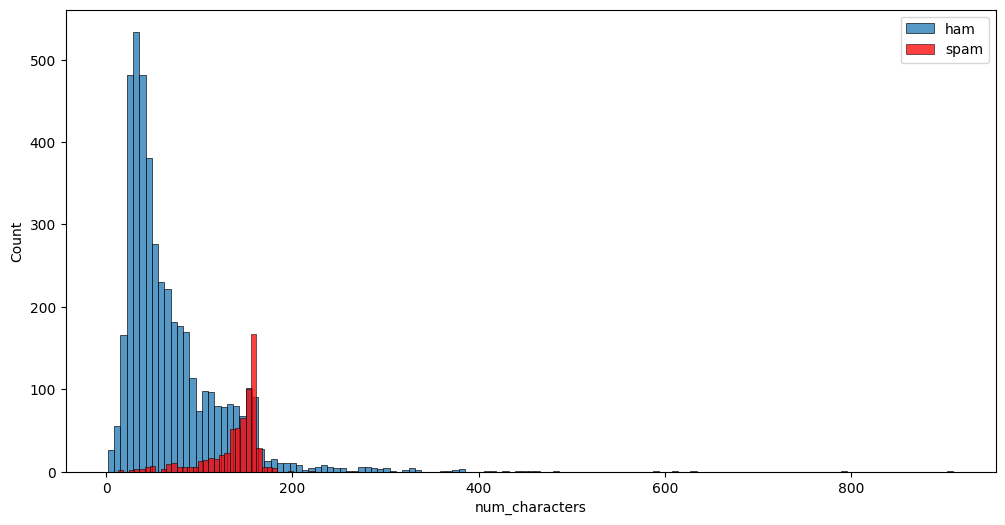

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"] == 0]["num_characters"], label="ham")
sns.histplot(df[df["target"] == 1]["num_characters"], label="spam" , color="red")
plt.legend()
plt.show()

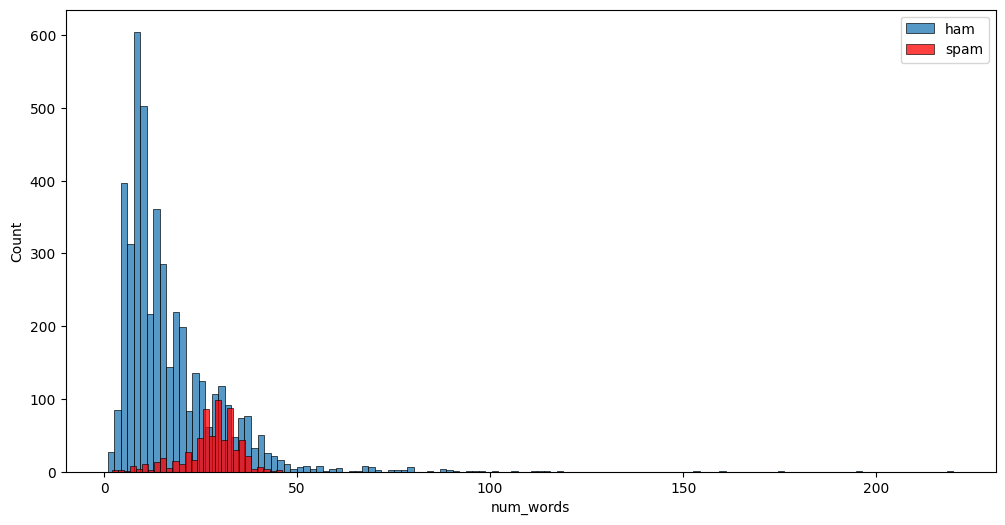

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"] == 0]["num_words"], label="ham")
sns.histplot(df[df["target"] == 1]["num_words"], label="spam" , color="red")
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\AppData\Local\Temp\ipykernel_30944\1835598642.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


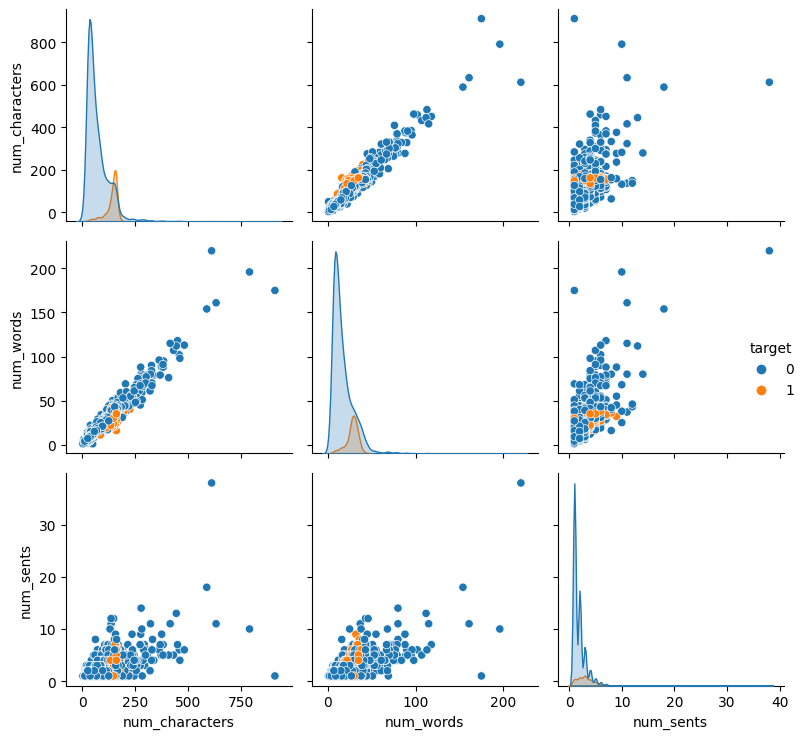

In [25]:
sns.pairplot(df, hue="target")
plt.tight_layout()
plt.show()

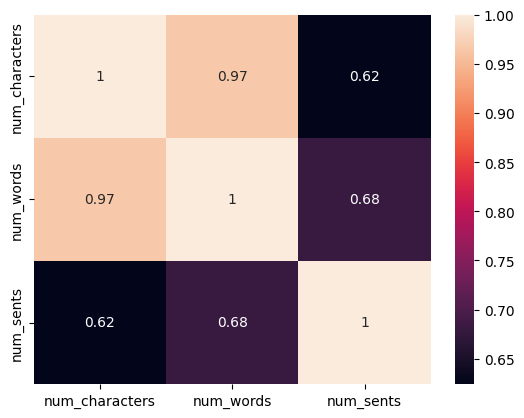

In [26]:
sns.heatmap(df[df.columns[2:]].corr(), annot=True)
plt.show()

High colinearity, so we only take `num_char`

#### Data Preprocessing

In [27]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [28]:
ps = PorterStemmer()

In [29]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for word in text:
        if word.isalnum():
            y.append(word)

    text = y[:]
    y.clear()

    for word in text:
        if word not in stopwords.words("english") and word not in string.punctuation:
            y.append(word)

    text = y[:]
    y.clear()

    for word in text:
        y.append(ps.stem(word))

    return " ".join(y)

In [30]:
transform_text(df["text"][90])

'yeah stand close catch someth'

In [31]:
df["transformed_text"] = df["text"].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Words freq visualization in spam and ham

In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [33]:
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))

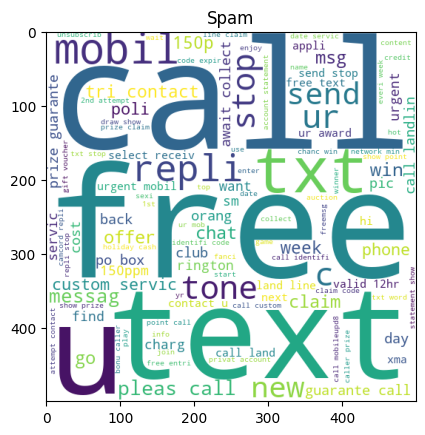

In [34]:
plt.imshow(spam_wc)
plt.title("Spam")
plt.show()

In [35]:
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))

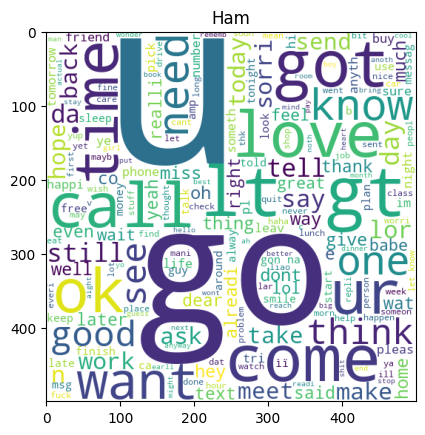

In [36]:
plt.imshow(ham_wc)
plt.title("Ham")
plt.show()

Top 30 words in spam and ham

In [37]:
df.head()

,target,text,num_characters,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [39]:
ham_corpus = []
for msg in df[df["target"] == 0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [40]:
len(spam_corpus), len(ham_corpus)

(9939, 35404)

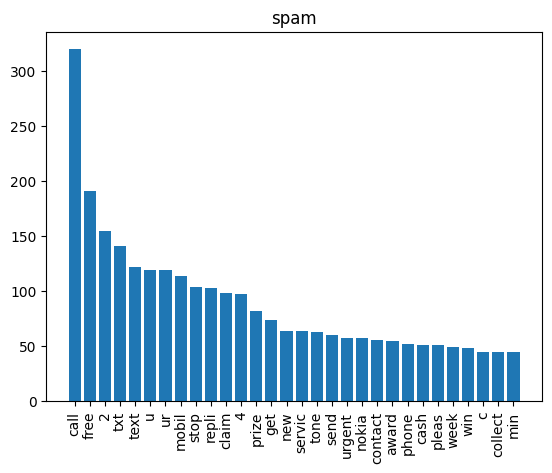

In [41]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 90)
plt.title("spam")
plt.show()

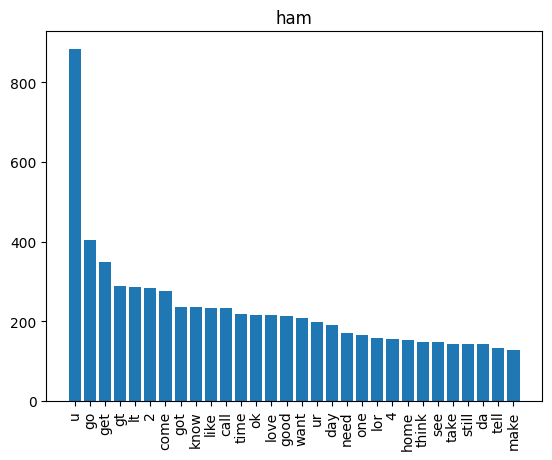

In [42]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 90)
plt.title("ham")
plt.show()

Model Building

In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [44]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
X.shape

(5169, 3000)

In [46]:
y = df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [48]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [49]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [50]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [51]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [52]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


#### Improving model

#### Saving Models

In [53]:
import pickle
pickle.dump(tfidf, open("Vectorizer.pkl","wb"))
pickle.dump(mnb, open("model.pkl","wb"))

In [60]:
len(mnb.predict(x_test))
temp = mnb.predict(x_test)
temp

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
for i in temp:
    if i==1:
        print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
